<a href="https://colab.research.google.com/github/ayumawaddawarohma/test/blob/main/PCD_pertemuan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

openCV refrence
1. https://youtu.be/oXlwWbU8l2o
2. https://www.geeksforgeeks.org/opencv-python-tutorial/


# Digital Image Representation

In [ ]:
# get image from link google image
import urllib.request
# from PIL import Image  # https://www.geeksforgeeks.org/python-pillow-a-fork-of-pil/
# https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png

urllib.request.urlretrieve(
'https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png', # link from google image
"gfg.png")

# img = Image.open("gfg.png") #load image filename

('gfg.png', <http.client.HTTPMessage at 0x7918a8672410>)

Resolusi gambar: 300x300 piksel


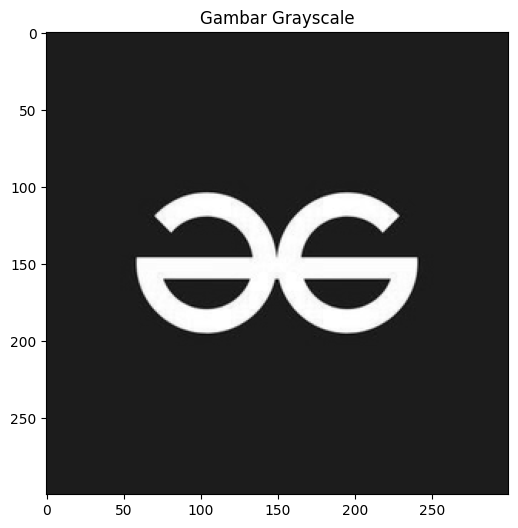

In [ ]:
# load image

import cv2 # https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
image = cv2.imread('gfg.png', cv2.IMREAD_GRAYSCALE)


# Dapatkan resolusi gambar dalam piksel
width, height = image.shape
print(f"Resolusi gambar: {width}x{height} piksel")

# Menampilkan gambar
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()

In [ ]:
# image data representation
print('display the image matrix contains',len(image[:2]),'pixels')
print(image[:2]) # [start:stop] -- select the row data

# print(image[:,:2]) # [row,column] -- select the coloumn data

display the image matrix contains 2 pixels
[[105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105
  105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105

In [ ]:
# save image data to txt files
pixel_data = np.array(image)

# Saving the 2D array in a text file
np.savetxt('image_data.txt', pixel_data, fmt='%d')

## Plot 2d -- 1d representation

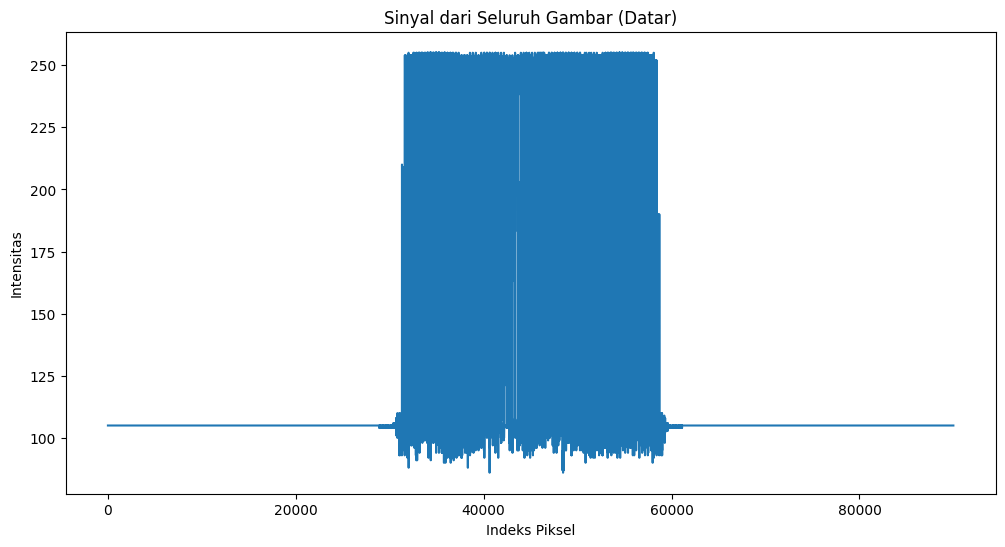

In [ ]:
# Jika ingin melihat sinyal dari seluruh gambar (2D sinyal)
signal_2d = image.flatten()  # Mengubah gambar menjadi vektor 1D --> ref : https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

# # Menentukan nilai xlabel berdasarkan indeks piksel
# num_pixels = signal_2d.shape[0]  # Total jumlah piksel setelah diflatten

plt.figure(figsize=(12, 6))
plt.plot(signal_2d)
plt.title('Sinyal dari Seluruh Gambar (Datar)')
plt.xlabel('Indeks Piksel') # karena di flatten maka indexs pixel menjadi height×width
plt.ylabel('Intensitas')
plt.show()

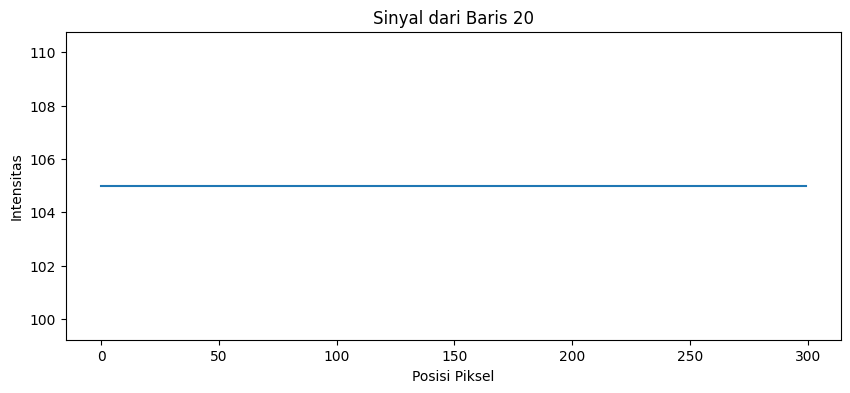

In [ ]:
# Mengambil satu baris gambar sebagai sinyal (misalnya, baris ke-100)
row = 20
signal = image[row, :]  # Mengambil nilai intensitas dari baris 100

# Menampilkan sinyal (intensitas piksel pada baris 100)
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title(f'Sinyal dari Baris {row}')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')
plt.show()

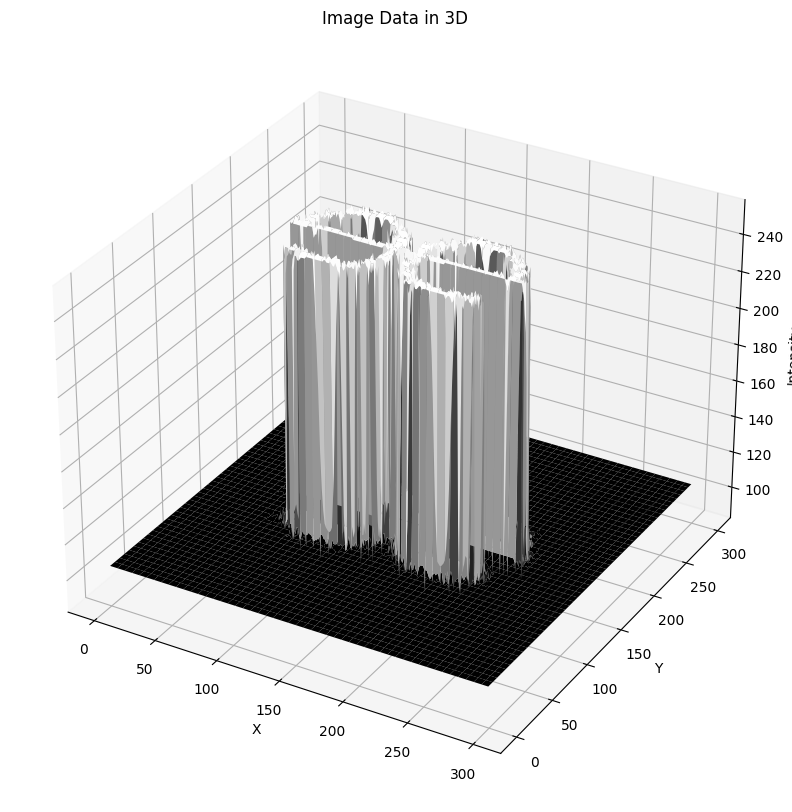

In [ ]:
# 3D plotting -- https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#create 3d plot
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

# image data
x = np.arange(image.shape[1]) # x-coordinate (kolom)
y = np.arange(image.shape[0]) # y-coordinate (baris)
X, Y = np.meshgrid(x, y) # The meshgrid function has the inputs x and y are lists containing the independent data set.

# Plot the image data
ax.plot_surface(X, Y, image, cmap='gray')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('Image Data in 3D')
plt.show()

# Image resolution


## Spatial Resolution

The more pixels there are in the digital image, the more detailed the image will be

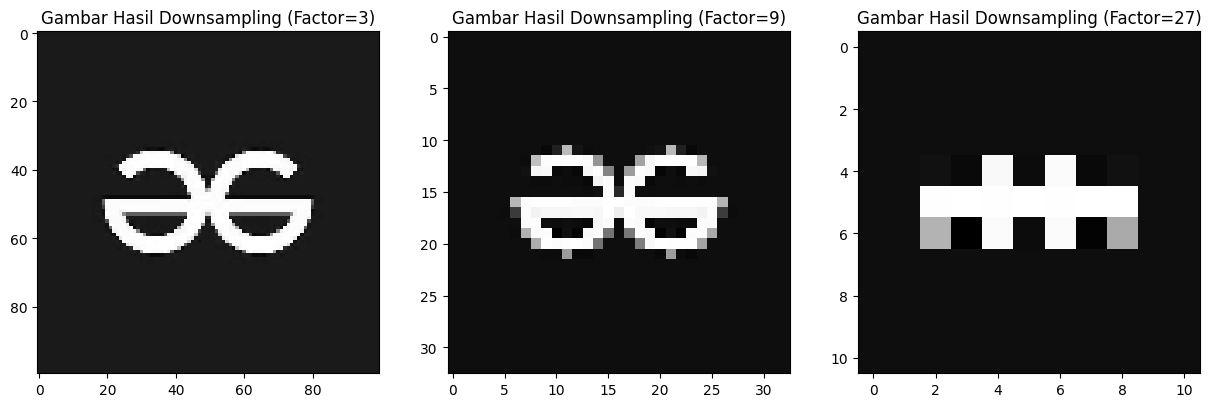

In [ ]:
# Downsampling process
factors = 3**np.arange(1,4)
# factors = [1,2,3]
# print(factors)

#create a subplot for each sample
figure,axis = plt.subplots(1,len(factors),figsize=(15,5))

# loop over each sampling factor
for factor, ax in zip(factors,axis): # https://pub.aimind.so/unleashing-the-power-of-enumerate-zip-and-map-when-use-in-python-a76bfd6297fc
    new_size = (image.shape[1] // factor, image.shape[0] // factor) # process downsampling -- baris dan colom
    downsampled_image = cv2.resize(image, new_size)
    ax.imshow(downsampled_image, cmap='gray')
    ax.set_title(f'Gambar Hasil Downsampling (Factor={factor})')
plt.show()

image size for factor 3 (900, 900)
image size for factor 9 (2700, 2700)
image size for factor 27 (8100, 8100)


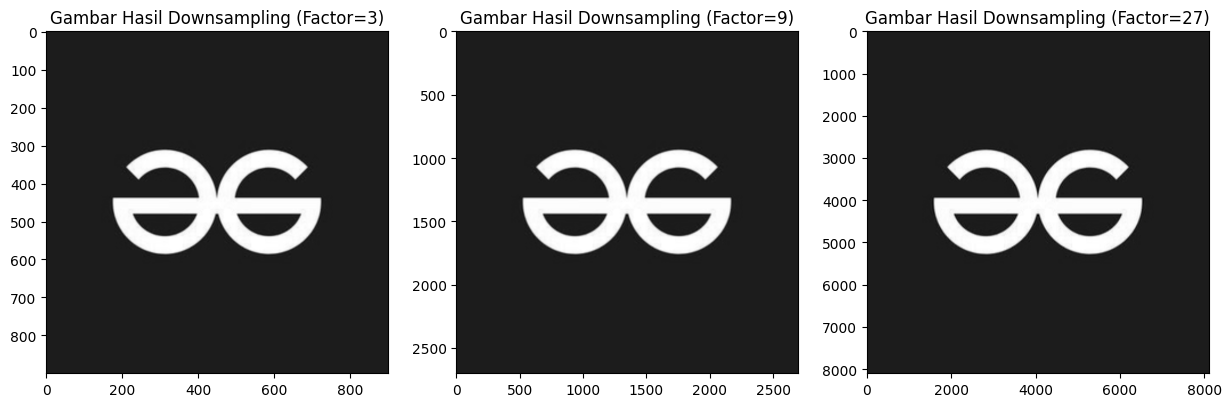

In [ ]:
# upsampling process
factors = 3**np.arange(1,4)

figure,axis = plt.subplots(1,len(factors),figsize=(15,5))
for factor, ax in zip(factors,axis):
    new_size = (image.shape[1] * factor, image.shape[0] * factor) # process upsampling
    upsampled_image = cv2.resize(image, new_size)
    ax.imshow(upsampled_image, cmap='gray')
    ax.set_title(f'Gambar Hasil Downsampling (Factor={factor})')
    print(f'image size for factor {factor}', upsampled_image.shape)
plt.show()

## Intensity Resolution

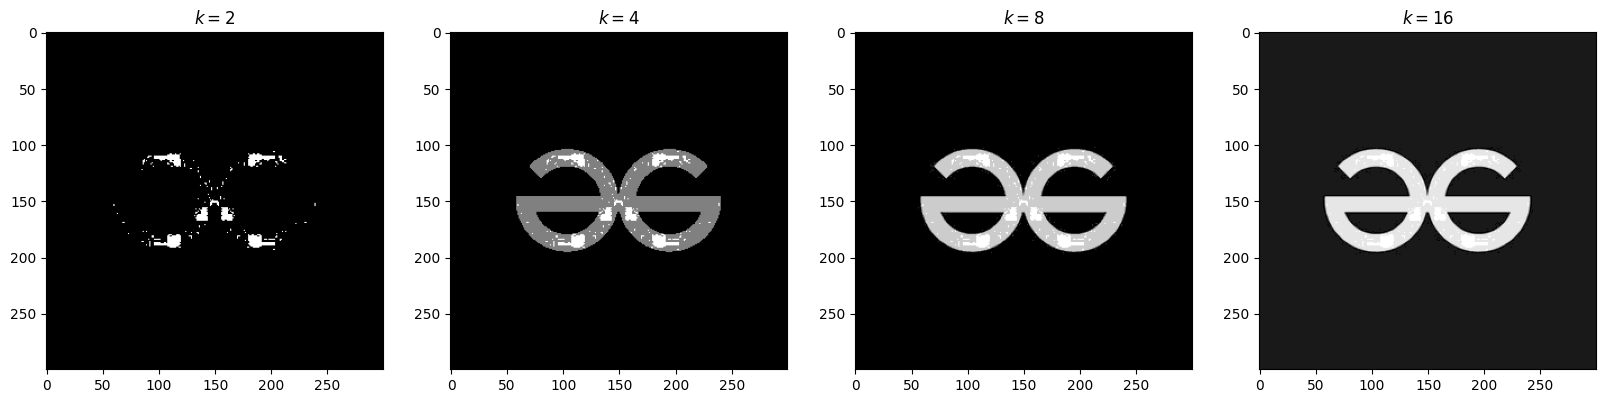

In [ ]:
# Membuat faktor kuantisasi
factors = 2**np.arange(1, 5)
# Menyiapkan subplot
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
# Iterasi melalui faktor-faktor kuantisasi
for idx, (k, ax) in enumerate(zip(factors, axis)):
    # Membuat bins dengan k level
    bins = np.linspace(0, image.max(), k) # Synatx: numpy.linspace(start, stop, num=50, endpoint=True , retstep=False, dtype=None, axis=0)
    # print(bins)

    # Kuantisasi gambar ke dalam bins
    quantized_image = np.digitize(image, bins) - 1  # Dikurangi 1 agar hasil sesuai dengan indeks list
    # Membangun ulang gambar kuantisasi
    reconstructed_image = np.take(bins, quantized_image)  # Ambil nilai intensitas dari bins
    # Tampilkan gambar hasil kuantisasi
    ax.imshow(reconstructed_image, cmap='gray')
    ax.set_title(f'$k = {k}$')
plt.show()


## Image Interpolation / Image Resizing

 Using the known pixel values we estimate the pixel value at any particular location in the resized image

There are several interpolation techniques that can be used when resizing images such as Nearest Neighbour Interpolation, Bilinear Interpolation, and Bicubic Interpolation

https://www.geeksforgeeks.org/image-resizing-using-opencv-python/

Choice of Interpolation Method for Resizing:

1. cv2.INTER_AREA: This is used when we need to shrink an image.
2. cv2.INTER_CUBIC: This is slow but more efficient.
3. cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

### A.Nearest Neighbour Interpolation

interpolate the nearest pixel to the current pixel


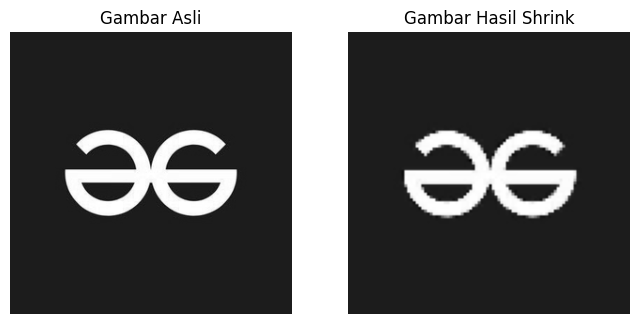

In [ ]:
# shrink an image
size = (100, 100)
shrink_image = cv2.resize(image, size, interpolation=cv2.INTER_NEAREST)
plt.figure(figsize=(8,4))
# Subplot for original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Subplot for shrinked image
plt.subplot(1, 2, 2)
plt.imshow(shrink_image, cmap='gray')
plt.title("Gambar Hasil Shrink")
plt.axis('off')

plt.show()

In [ ]:
# Membandingkan data piksel
print("Original Image Shape: ", image.shape)
print("Shrink Image Shape: ", shrink_image.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
original_pixels = image[:10, :10]  # Ambil 5x5 bagian atas dari gambar asli
shrink_pixels = shrink_image[:10, :10]  # Ambil 5x5 bagian atas dari gambar shrink

print("\nData Piksel Gambar Asli (10x10 bagian):\n", original_pixels)
print("\nData Piksel Gambar Hasil Shrink (10x10 bagian):\n", shrink_pixels)

Original Image Shape:  (300, 300)
Shrink Image Shape:  (100, 100)

Data Piksel Gambar Asli (10x10 bagian):
 [[105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]]

Data Piksel Gambar Hasil Shrink (10x10 bagian):
 [[105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 10

In [ ]:
# Menghitung perbedaan antara gambar asli dan shrink
difference = cv2.resize(image, size, interpolation=cv2.INTER_NEAREST) - shrink_image
print("\nPerbedaan Data Piksel (5x5 bagian):\n", difference[:, :])


Perbedaan Data Piksel (5x5 bagian):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### B. Bicubic Interpolation

In bicubic interpolation we take 16 pixels around the pixel to be interpolated (4x4 neighbourhood) as compared to the 4 pixels (2x2 neighbourhood) we take into account for bilinear interpolation

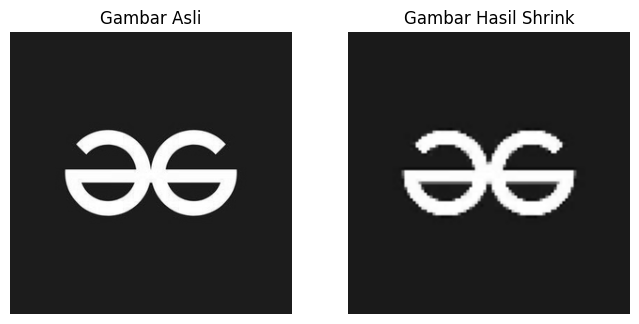

In [ ]:
# shrink an image
size = (100, 100)
shrink_image_bicubic = cv2.resize(image, size, interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(8,4))
# Subplot for original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Subplot for shrinked image
plt.subplot(1, 2, 2)
plt.imshow(shrink_image_bicubic, cmap='gray')
plt.title("Gambar Hasil Shrink")
plt.axis('off')

plt.show()

In [ ]:
# Membandingkan data piksel
print("Original Image Shape: ", image.shape)
print("Shrink Image Shape: ", shrink_image_bicubic.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
original_pixels = image[:10, :10]  # Ambil 5x5 bagian atas dari gambar asli
shrink_pixels_bicubic = shrink_image_bicubic[:10, :10]  # Ambil 5x5 bagian atas dari gambar shrink

print("\nData Piksel Gambar Asli (5x5 bagian):\n", original_pixels)
print("\nData Piksel Gambar Hasil Shrink (5x5 bagian):\n", shrink_pixels_bicubic)

Original Image Shape:  (300, 300)
Shrink Image Shape:  (100, 100)

Data Piksel Gambar Asli (5x5 bagian):
 [[105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]]

Data Piksel Gambar Hasil Shrink (5x5 bagian):
 [[105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 10

### C. Bilinear interpolation

In bilinear interpolation we take the values of four nearest known neighbours (2x2 neighbourhood) of unknown pixels and then take the average of these values to assign the unknown pixel.

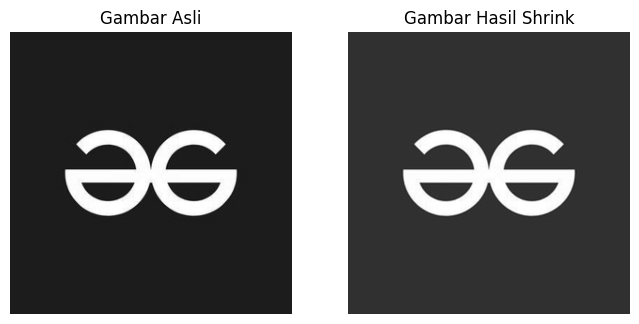

In [ ]:
# shrink an image
size = (500, 500)
zoom_image = cv2.resize(image, size, interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(8,4))
# Subplot for original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Subplot for shrinked image
plt.subplot(1, 2, 2)
plt.imshow(zoom_image, cmap='gray')
plt.title("Gambar Hasil Shrink")
plt.axis('off')

plt.show()

In [ ]:
# Membandingkan data piksel
print("Original Image Shape: ", image.shape)
print("Shrink Image Shape: ", zoom_image.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
original_pixels = image[:10, :10]  # Ambil 5x5 bagian atas dari gambar asli
zoom_image_pixels = zoom_image[:10, :10]  # Ambil 5x5 bagian atas dari gambar shrink

print("\nData Piksel Gambar Asli (10x10 bagian):\n", original_pixels)
print("\nData Piksel Gambar Hasil Shrink (10x10 bagian):\n", zoom_image_pixels)

Original Image Shape:  (300, 300)
Shrink Image Shape:  (500, 500)

Data Piksel Gambar Asli (10x10 bagian):
 [[105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]]

Data Piksel Gambar Hasil Shrink (10x10 bagian):
 [[105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 105 105 105 105 105]
 [105 105 105 105 105 10

# Tugas Pemrosesan Gambar dengan Downsampling, Kuantisasi, dan Shrinking

1. Lakukan pemrosesan gambar dengan menggunakan teknik downsampling, kuantisasi, dan shrinking. Anda akan menganalisis perbedaan yang terjadi pada gambar setelah dilakukan setiap proses, serta membandingkan data piksel dari gambar asli dan hasil pemrosesan.
